# 1. 选题背景说明 
生鲜超市中销售的蔬菜品种众多，一般蔬菜商品保鲜期都比较短，因此需要根据各商品的历
史销售数据进行补货。从消费者需求来看，蔬菜类商品的销量一般和时间有关联关系，不同
品种的蔬菜销量也不尽相同，但蔬菜商品的不同品类之间会存在一定的关联关系，据此可以
分析蔬菜各品类及单品销售量的分布规律及相互关系，以此辅助商品进货决策。

# 2. 分析目标 
数据可视化能帮助人们跟直观地理解数据，发掘数据中的模式、趋势和关联，通过数据可视化可以使数据更加清晰和易于理解，运用数据可视化技术把复杂的数据表现为折线图，便于观测蔬菜各品种的销量区别以及销量
随时间变化的趋势，挖掘出数据的内在关联，帮助生鲜超市预测补货量，起到辅助分析的作用。

In [5]:
##加载必要的包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

In [6]:
##显示中文标签的必要配置
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
from pylab import mpl
# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"]=False

# 3. 数据获取和说明 
数据来源于收集的蔬菜销售数据，横轴为蔬菜的大类，分为水生根茎类、花叶类、花菜类、
茄类、辣椒类和食用菌，纵轴为从 2020 年 07 月 01 日开始的一年销售时序数据。收集数据
时已经考虑到一部分数据处理了问题，所以收集的数据都是相对完整、规整的数据。
使用pandas读取收集到的蔬菜数据，然后对数据进行初步的处理，如去除异常值等。

In [7]:
##读取数据
vegetable = pd.read_excel("蔬菜销量表.xlsx").iloc[:,1:]
##去除异常值
vegetable.dropna()

,水生根茎类,花叶类,花菜类,茄类,辣椒类,食用菌
0,4.850,205.402,46.640,35.374,76.715,35.365
1,4.600,198.362,43.943,32.199,66.064,48.510
2,9.572,190.779,42.076,35.896,64.253,42.442
3,5.439,236.587,55.662,57.067,81.282,47.262
4,4.019,223.899,55.474,61.816,98.496,73.213
...,...,...,...,...,...,...
359,19.982,213.547,56.542,31.776,79.121,49.140
360,9.933,125.782,35.784,21.088,45.810,33.153
361,9.520,110.196,34.383,19.721,40.321,26.399
362,7.464,125.415,27.052,27.425,39.114,41.537


# 4. 数据探索和预处理 
读取数据，使用 pandas 的 dropna（）去除空值，之后使用使用经过 pandas 封装的画图方
法 plot（）画出日销量的变化图。

<AxesSubplot: >

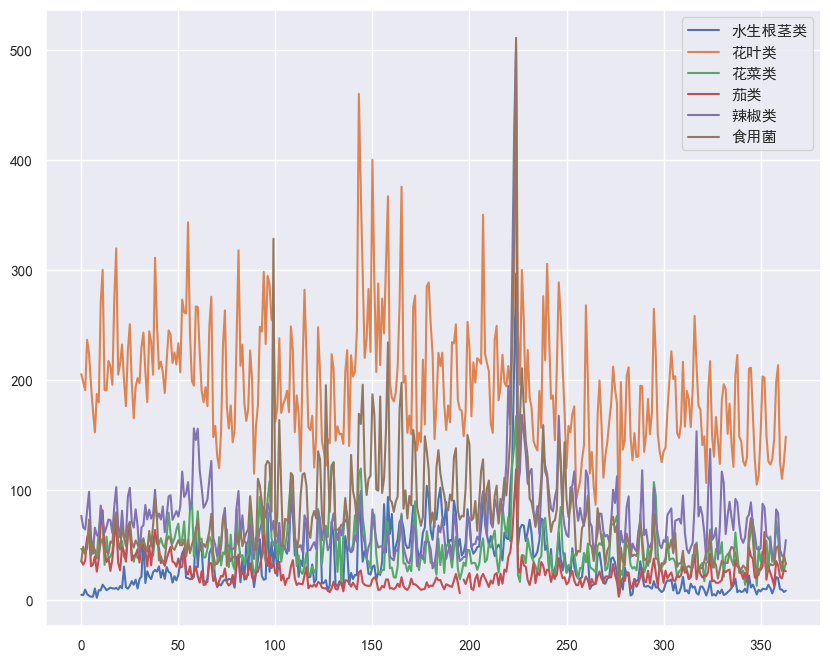

In [8]:
##画图
vegetable.plot()

<AxesSubplot: >

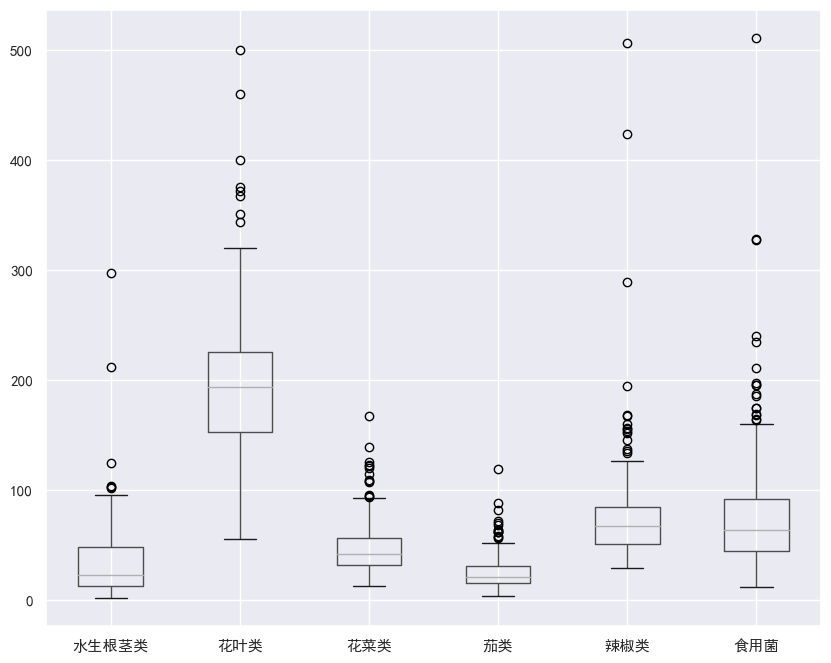

In [9]:
##绘制箱线图
vegetable.boxplot()

箱线图是一种用于显示数据分布情况的统计图表，可以帮助我们直观了解数据的分布情况，如中心趋势、离散程度和异常值情况，简单易用，是数据分析常用的工具，用于比较不同组数据的分布情况或者检测异常值。
由以上箱线图可以看出，数据虽然由一定的异常值，但是整体处在一个稳定的区间内，考虑到现实情况，可以认为数据是有效用的。

# 5. 数据建模分析

<AxesSubplot: >

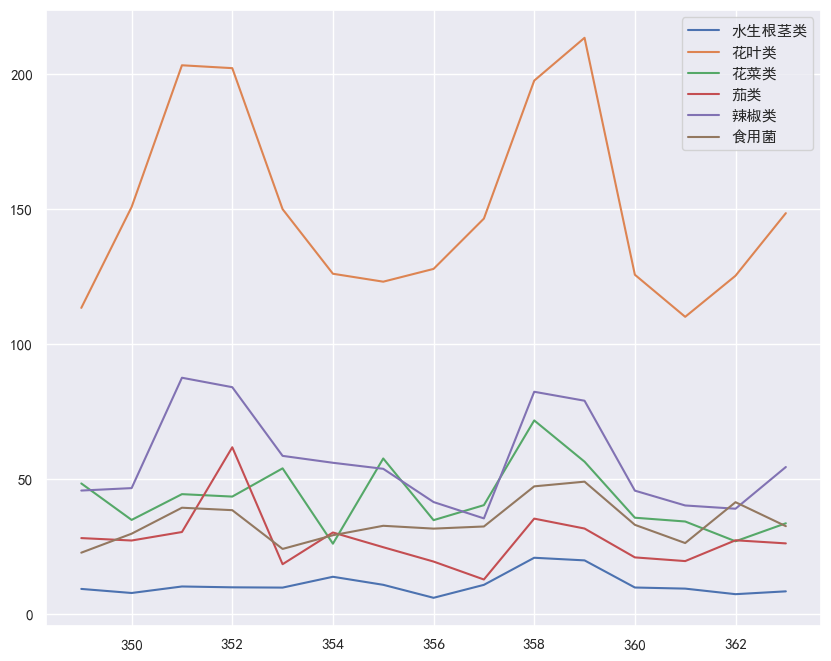

In [10]:
##取出最后15天数据并绘图
vegetable.iloc[-15:,].plot()

观察图可以各折线图发现销量变化具有一定的关联，联想到可以使用皮尔逊系数对各变量进行相关分析。
皮尔逊相关系数是一种常用于衡量两个变量之间的线性相关程度的统计量，越接近1表示数据之间的关联越大，可以帮助我们了解两个变量之间的线性相关程度，广泛应用于变量之间的关联性。

Text(0.5, 1.0, 'Peasron Correlation Heatmap')

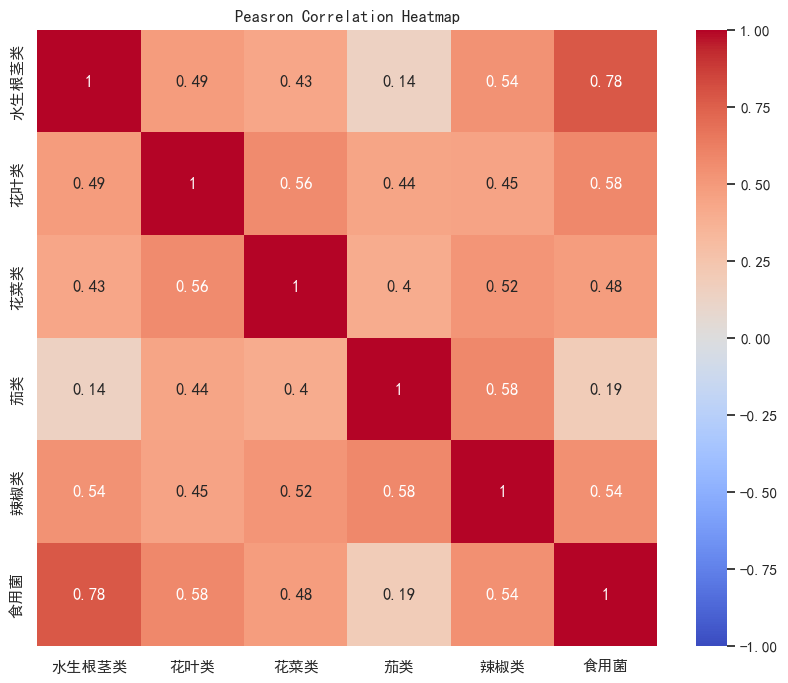

In [11]:
sns.heatmap(vegetable.corr(method='pearson'),annot=True,cmap="coolwarm",vmin=-1,vmax=1)
plt.title("Peasron Correlation Heatmap")

观察热力图发现各蔬菜品类之间的相关系数符合上图的销量变化，茄类的变化相对独立，和其它变量变化关系不大，水生根茎和食用菌变化一致性比较大。

<AxesSubplot: >

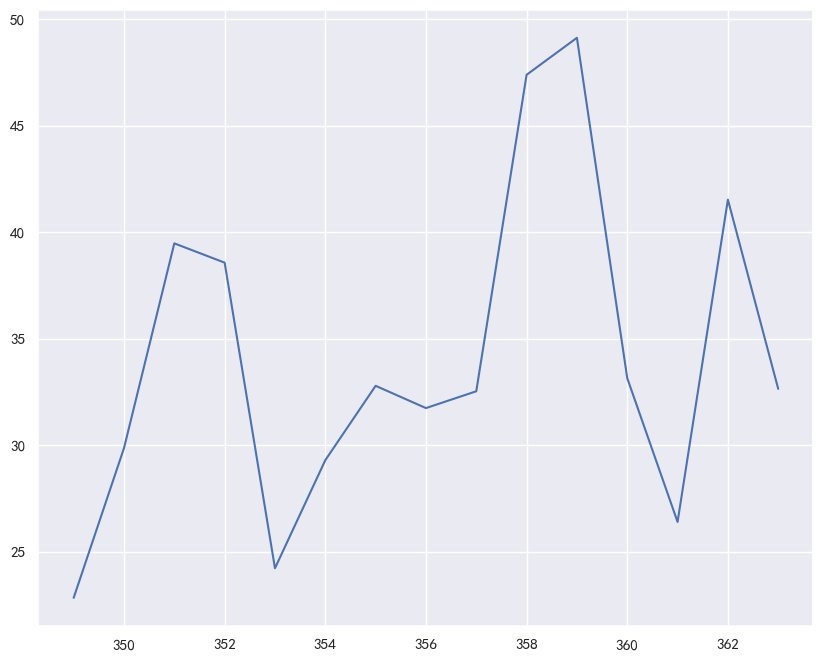

In [59]:
## 选取数据
data = vegetable.iloc[-15:,-1].values[:,np.newaxis]
## 绘图
vegetable.iloc[-15:,-1].plot()

选取水生根茎类的最后15天数据

In [83]:
##导入回归模型
from sklearn.linear_model import Ridge
##导入数据预处理模型
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
data = scalar.fit_transform(data)
# 创建岭回归模型并训练
ridge = Ridge(alpha=0.4)  # alpha是正则化参数
ridge.fit(data,np.arange(1,16))
pred = ridge.predict(data)

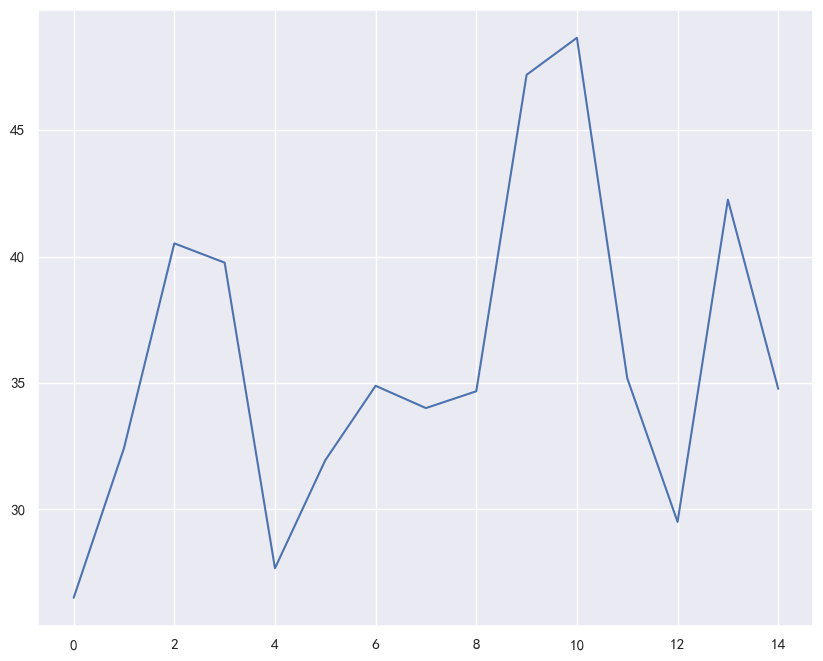

In [84]:
##plt.plot(scalar.inverse_transform(pred.reshape(-1,1)).ravel())
plt.plot(pred*4.5)

# 6. 结果描述和解释 
运用数据挖掘工具和可视化方法，我们可以发现蔬菜商品在春节期间会有一个高峰，因为这
一天是重大节日，对蔬菜一类食品需求量会大幅上升，所以商家可以在春节期间大量囤货。
不同商品之间会有一定的关联关系，在进货前一天可以根据各商品的关联关系预测下一天的变化。在回归分析中使用了sklearn提供的回归模型，原始数据的变化趋势复杂，可以使用多重线性回归。先导入Ridge类、数据预处理工具，训练模型并用于预测数据。在预测的销售量变化趋势图中可以观察到和原始的数据变化图趋势基本一致，是一个可靠的模型，可以利用这个模型来预测蔬菜销售量的未来趋势，为客户提供进货决策支持。